In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from collections import Counter
from activ import load_data
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as _sch
from info_measures.continuous.kraskov_stoegbauer_grassberger import Entropy

In [21]:
help(Entropy)
dir(Entropy)

Help on class Entropy in module info_measures.continuous.kraskov_stoegbauer_grassberger:

class Entropy(builtins.object)
 |  Estimate the entropy of a distribution with continuous support based on
 |  nearest-neighbor methods.
 |  
 |  Parameters
 |  ----------
 |  X : data (n_samples, n_dim)
 |      Data matrix
 |  k : int
 |      k-nearest-neighbor will be used. (default=3)
 |  add_noise : bool
 |      Small (1e-10) noise to break degeneracy. (default=False)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, X, k=3, add_noise=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  entropy(self, k=None, n_jobs=-1)
 |      The classic K-L k-nearest neighbor continuous entropy estimator.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'entropy']

In [7]:
nmfdata = load_data(uoinmf=True)

In [8]:
nmf_oc = nmfdata.outcomes
nmf_oc.shape

(247, 6)

In [9]:
w1 = nmf_oc[:,0]
w2 = nmf_oc[:,1]
w3 = nmf_oc[:,2]
w4 = nmf_oc[:,3]
w5 = nmf_oc[:,4]
w6 = nmf_oc[:,5]
ws = [w1, w2, w3, w4, w5, w6]
w1.shape

(247,)

In [10]:
np.expand_dims(w2, axis=1)
w1.shape

(247,)

In [11]:
file = '/Users/ahyeon/Desktop/activ misc/sweep_u2-10_c2-50_i50_raw-oc-cluster_uoinmf-bm-predict/umap_clustering_sweep.h5'

In [12]:
f = h5py.File(file, 'r')

In [13]:
umap_dims = f['umap_dimensions'][:]
score = f['score'][:]
norm_score = f['norm_score'][:]
clusters = f['clusters'][:]
cluster_sizes = f['cluster_sizes'][:]
emb = f['umap_embeddings'][:]
scale = f['umap_embeddings_dimscale'][:][:54]

In [25]:
w6

array([ 0.        ,  0.12754668,  0.        ,  0.        ,  0.        ,
        2.70533891,  0.21511741,  0.        ,  1.71368507,  0.        ,
        0.44663051,  5.91581755,  0.15543001,  0.11959411,  0.        ,
        1.23282155,  0.        ,  0.        ,  0.        ,  0.        ,
        1.63734391,  0.        ,  0.        ,  0.77783888,  0.83761882,
        0.        ,  3.99909032,  0.51229646,  0.03559384,  1.2037469 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.24974772,  3.98136199,  0.74181731,  1.9631771 ,  0.58201662,
        0.        ,  0.        ,  1.43116278,  0.        ,  2.76397339,
        0.        ,  0.35073568,  1.81261024,  1.00933081,  2.30005568,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        4.62389994,  0.        ,  0.        ,  0.11423547,  0.        ,
        0.46238102,  0.        ,  1.21031991,  1.03354433,  0.35608112,
        0.01341702,  3.84728604,  3.43168638,  0.        ,  0.  

In [26]:
w = Entropy(w6)
print(w)

ValueError: not enough values to unpack (expected 2, got 1)

In [28]:
w = np.expand_dims(w6, axis=1)
w1_ent = Entropy(w)
for ii,c in enumerate(cluster_sizes):
    ent = w1_ent.entropy(k=3)
    print(ent)

-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf


/Users/ahyeon/info_measures/info_measures/continuous/kraskov_stoegbauer_grassberger.py:66: RuntimeWarning: divide by zero encountered in log
  return const + self.n_dim * np.mean(np.log(nn))


In [15]:
for dim in umap_dims:
    all_dmat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='mahalanobis')
        all_dmat[:,x] = dmat
    mean = all_dmat.mean(axis=1)

In [16]:
def calc_entropy(gose_scores):
    probs = np.array(list(Counter(gose_scores).values()))/len(gose_scores)
    return entropy(probs, base=2.0)

In [17]:
def jesse_entropy(cluster_sizes, data):
    values = []
    tree = _sch.linkage(mean, method='ward')
    labels = _sch.cut_tree(tree, cluster_sizes)

    for ii,c in enumerate(cluster_sizes):
        entropies = []
        for label in np.unique(labels[:,ii]):
            scores = data[labels[:,ii]==label]
            ent = Entropy(scores)
            ent2 = ent.entropy(k=3)
            entropies.append(ent2)
        v = np.mean(entropies)
        values.append(v)
    return values

In [18]:
jessew1 = jesse_entropy(cluster_sizes, w1)

ValueError: not enough values to unpack (expected 2, got 1)

In [30]:
def entropy_across_clusters(cluster_sizes, data):
    values = []
    tree = _sch.linkage(mean, method='ward')
    labels = _sch.cut_tree(tree, cluster_sizes)

    for ii,c in enumerate(cluster_sizes):
        entropies = []
        for label in np.unique(labels[:,ii]):
            scores = data[labels[:,ii]==label]
            ent = calc_entropy(scores)
            entropies.append(ent)
        v = np.mean(entropies)
        values.append(v)
    return values

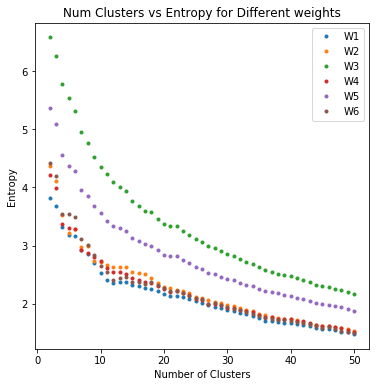

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(6,6))
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w1), '.', label='W1')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w2), '.', label='W2')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w3), '.', label='W3')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w4), '.', label='W4')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w5), '.', label='W5')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w6), '.', label='W6')
plt.xlabel('Number of Clusters')
plt.ylabel('Entropy')
plt.title('Num Clusters vs Entropy for Different weights')
plt.legend() 
plt.show()
plt.savefig('/Users/ahyeon/Desktop/activ misc/weights_entropy.pdf')